#Project Overview

**Objective:** Utilizing electronics e-commerce review data, create a model to predict the review an electronics product will receive. 

**Actionable Takeaways:** Provide feature importance insights, recommendations and caveats to optimize e-commerce efforts and positive reviews.

# Importing Data and Tools

In [1]:
!pip install pandas-profiling==2.*
!pip install category_encoders==2.*

#Importing standard libraries to view and assess the data.
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

#Importing sklearn libraries and tools to analyze, model and predict the data.
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, RandomizedSearchCV

from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance 

     |████████████████████████████████| 245kB 5.3MB/s 
     |████████████████████████████████| 112kB 9.7MB/s 
     |████████████████████████████████| 3.1MB 7.4MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 1.1MB 35.4MB/s 
     |████████████████████████████████| 296kB 31.3MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=3747d99a2a67ad9c3fa5c3a064114845dbb379fa363b68e3845787e731db383c
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=1551dd166b5fbb039011c39b18c0c21cce39df792f44b2926b6d6cf2ce2f4887
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but y

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the csv from local files.

import io
from google.colab import files
uploaded = files.upload()

Saving DatafinitiElectronicsProductData.csv to DatafinitiElectronicsProductData.csv


In [3]:
#Reading in the csv raw to see what we are working with.

#date_columns = ['dateAdded', 'dateUpdated', 'reviews.date', 'reviews.dateSeen']

raw_df = pd.read_csv('DatafinitiElectronicsProductData.csv')

column_names = ['ID', 'ASINS', 'Brand', 'Categories', 'Colors', 'Date Added', 'Date Updated', 'Dimension', 'EAN', 'imageURLs', 'keys', 'Manufacturer', 'manufacturerNumber', 'Product Name', 'primaryCategories', 'Review Date', 'Date Collected', 'Review Recommended', 'Review Helpful', 'Rating', 'Review URL', 'Review Text', 'Review Title', 'Reviewer', 'Source URLs', 'UPC', 'Weight']

raw_df.columns=(column_names)

raw_df.set_index('Review Date', inplace=True)

raw_df.head()

,ID,ASINS,Brand,Categories,Colors,Date Added,Date Updated,Dimension,EAN,imageURLs,keys,Manufacturer,manufacturerNumber,Product Name,primaryCategories,Date Collected,Review Recommended,Review Helpful,Rating,Review URL,Review Text,Review Title,Reviewer,Source URLs,UPC,Weight
Review Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-04T00:00:00.000Z,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2015-12-04T00:00:00.000Z,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2015-12-04T00:00:00.000Z,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2015-12-01T00:00:00.000Z,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2015-11-28T00:00:00.000Z,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


# Exploratory Data Analysis (EDA)

##Data Exploration


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7299 entries, 2015-12-04T00:00:00.000Z to 2015-03-13T00:00:00.000Z
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  7299 non-null   object 
 1   ASINS               7299 non-null   object 
 2   Brand               7299 non-null   object 
 3   Categories          7299 non-null   object 
 4   Colors              5280 non-null   object 
 5   Date Added          7299 non-null   object 
 6   Date Updated        7299 non-null   object 
 7   Dimension           6090 non-null   object 
 8   EAN                 2951 non-null   float64
 9   imageURLs           7299 non-null   object 
 10  keys                7299 non-null   object 
 11  Manufacturer        4632 non-null   object 
 12  manufacturerNumber  7299 non-null   object 
 13  Product Name        7299 non-null   object 
 14  primaryCategories   7299 non-null   object 
 15  Date Collected   

In [5]:
raw_df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

##Data Review - Findings and Next Steps




# Feature Engineering

In [6]:
#Creating a way to assign each review to a retailer.
#Review URL uniquely identifies the retailer. Let's get to engineering!

print(raw_df['Review URL'])

Review Date
2015-12-04T00:00:00.000Z    http://reviews.bestbuy.com/3545/4562009/review...
2015-12-04T00:00:00.000Z    http://reviews.bestbuy.com/3545/4562009/review...
2015-12-04T00:00:00.000Z    http://reviews.bestbuy.com/3545/4562009/review...
2015-12-01T00:00:00.000Z    http://reviews.bestbuy.com/3545/4562009/review...
2015-11-28T00:00:00.000Z    http://reviews.bestbuy.com/3545/4562009/review...
                                                  ...                        
2017-03-10T00:00:00.000Z    http://www.ebay.com/itm/Logitech-Harmony-Ultim...
2017-02-12T00:00:00.000Z    http://reviews.bestbuy.com/3545/8180158/review...
2015-02-11T00:00:00.000Z    http://reviews.bestbuy.com/3545/8180158/review...
2013-07-05T00:00:00.000Z    http://reviews.bestbuy.com/3545/8180158/review...
2015-03-13T00:00:00.000Z    http://reviews.bestbuy.com/3545/8180158/review...
Name: Review URL, Length: 7299, dtype: object


In [7]:
raw_df['e_retailer'] = raw_df['Review URL'].str.split('.', expand=True)[1]

print(raw_df['e_retailer'])

Review Date
2015-12-04T00:00:00.000Z    bestbuy
2015-12-04T00:00:00.000Z    bestbuy
2015-12-04T00:00:00.000Z    bestbuy
2015-12-01T00:00:00.000Z    bestbuy
2015-11-28T00:00:00.000Z    bestbuy
                             ...   
2017-03-10T00:00:00.000Z       ebay
2017-02-12T00:00:00.000Z    bestbuy
2015-02-11T00:00:00.000Z    bestbuy
2013-07-05T00:00:00.000Z    bestbuy
2015-03-13T00:00:00.000Z    bestbuy
Name: e_retailer, Length: 7299, dtype: object


In [8]:
#To extract only the retailer we can split the URLs at the '.' because all URLs only have 2.
#Each '.' is typically on either side of the primary domain. In this case the retailer.
#Choose the (expand=True) parameter to separate the 3 newly created strings into individual columns.
#Selecting the [1] position to grab only the domain/retailer.
#This immediately drops the [0], the 'www', and [2], the '/productinformationetc'
#Renaming the newly created column to 'e_retailer'.

In [9]:
raw_df['Title_word_count'] = raw_df['Review Title'].str.len()
print(raw_df['Title_word_count'])

Review Date
2015-12-04T00:00:00.000Z    27.0
2015-12-04T00:00:00.000Z     4.0
2015-12-04T00:00:00.000Z     3.0
2015-12-01T00:00:00.000Z    13.0
2015-11-28T00:00:00.000Z    16.0
                            ... 
2017-03-10T00:00:00.000Z    12.0
2017-02-12T00:00:00.000Z    12.0
2015-02-11T00:00:00.000Z    11.0
2013-07-05T00:00:00.000Z    45.0
2015-03-13T00:00:00.000Z    11.0
Name: Title_word_count, Length: 7299, dtype: float64


In [10]:
raw_df['Review_word_count'] = raw_df['Review Text'].str.len()
print(raw_df['Review_word_count'])

Review Date
2015-12-04T00:00:00.000Z    128.0
2015-12-04T00:00:00.000Z     52.0
2015-12-04T00:00:00.000Z    135.0
2015-12-01T00:00:00.000Z     73.0
2015-11-28T00:00:00.000Z    153.0
                            ...  
2017-03-10T00:00:00.000Z    596.0
2017-02-12T00:00:00.000Z     66.0
2015-02-11T00:00:00.000Z     53.0
2013-07-05T00:00:00.000Z    230.0
2015-03-13T00:00:00.000Z     86.0
Name: Review_word_count, Length: 7299, dtype: float64


In [11]:
raw_df['Product_word_count'] = raw_df['Product Name'].str.len()
print(raw_df['Product_word_count'])

Review Date
2015-12-04T00:00:00.000Z     54
2015-12-04T00:00:00.000Z     54
2015-12-04T00:00:00.000Z     54
2015-12-01T00:00:00.000Z     54
2015-11-28T00:00:00.000Z     54
                           ... 
2017-03-10T00:00:00.000Z    124
2017-02-12T00:00:00.000Z     41
2015-02-11T00:00:00.000Z     41
2013-07-05T00:00:00.000Z     41
2015-03-13T00:00:00.000Z     41
Name: Product_word_count, Length: 7299, dtype: int64


##Dataframe Cleaning

In [12]:
#Creating a wrangle function for use on future iterations of this dataset type.
def wrangle(df):

  #Dropping inventory_columns because their data entries are for inventory supply chain purposes.
  #These are not regularly customer facing for review purposes.
  inventory_columns = ['ID', 'ASINS', 'Categories', 'EAN', 'imageURLs', 'keys', 'Manufacturer', 'manufacturerNumber', 'UPC']
  df.drop(labels=inventory_columns, axis=1, inplace=True)

  #Dropping product specification columns.
  product_specs = ['Colors', 'Dimension', 'Weight']
  df.drop(labels=product_specs, axis=1, inplace=True)

  #Dropping data collection columns.
  data_collection = ['Date Added', 'Date Collected']
  df.drop(labels=data_collection, axis=1, inplace=True)

  #Dropping constant columns.
  constant_cols = [col for col in df.select_dtypes('object') if df[col].nunique() < 2]
  df.drop(columns=constant_cols, inplace=True)

  #Dropping rating rows with no value entries.
  df.dropna(subset=['Rating'], inplace=True)

  #We expected, and only want, certain columns with high cardinality.
  #In order to achieve this we'll have to manually remove them.
  #We don't want a for loop to remove the lowest cardinality columns.
  nonrelevant_cols = ['Reviewer', 'Source URLs']
  df.drop(columns=nonrelevant_cols, axis=1, inplace=True)


  #Engineering 'Review URL' to generate 'e-retailer'.
  #This will prodive an additional feature for modeling.
  df['e_retailer'] = df['Review URL'].str.split('.', expand=True)[1]
  #We no longer need the original feature for further data analysis.
  df.drop(columns=['Review URL'], inplace=True)

  #Creating three new columns for added analysis.
  df['Title_word_count'] = df['Review Title'].str.len()
  df['Review_word_count'] = df['Review Text'].str.len()
  df['Product_word_count'] = df['Product Name'].str.len()

  #Dropping count rows with no value entries.
  df.dropna(subset=['Review_word_count', 'Title_word_count', 'Product_word_count'], inplace=True)

  #Dropping natural language columns.
  nat_lang_cols = ['Product Name', 'Review Text', 'Review Title']
  df.drop(columns=nat_lang_cols, inplace=True)


  #Filling na values in columns that did not require entry but can still prove useful to know it was not provided.
  df.fillna({'Colors':'Not Provided', 'Dimension':'Not Provided'}, inplace=True)

  return df

df = wrangle(raw_df)

In [13]:
df.head()

,Brand,Date Updated,Review Recommended,Review Helpful,Rating,e_retailer,Title_word_count,Review_word_count,Product_word_count
Review Date,,,,,,,,,
2015-12-04T00:00:00.000Z,Microsoft,2018-01-29T02:15:13Z,True,0.0,5.0,bestbuy,27.0,128.0,54
2015-12-04T00:00:00.000Z,Microsoft,2018-01-29T02:15:13Z,True,0.0,4.0,bestbuy,4.0,52.0,54
2015-12-04T00:00:00.000Z,Microsoft,2018-01-29T02:15:13Z,True,0.0,4.0,bestbuy,3.0,135.0,54
2015-12-01T00:00:00.000Z,Microsoft,2018-01-29T02:15:13Z,True,0.0,5.0,bestbuy,13.0,73.0,54
2015-11-28T00:00:00.000Z,Microsoft,2018-01-29T02:15:13Z,True,0.0,5.0,bestbuy,16.0,153.0,54


##Data Analysis - Clean

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7126 entries, 2015-12-04T00:00:00.000Z to 2015-03-13T00:00:00.000Z
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               7126 non-null   object 
 1   Date Updated        7126 non-null   object 
 2   Review Recommended  5908 non-null   object 
 3   Review Helpful      5813 non-null   float64
 4   Rating              7126 non-null   float64
 5   e_retailer          7126 non-null   object 
 6   Title_word_count    7126 non-null   float64
 7   Review_word_count   7126 non-null   float64
 8   Product_word_count  7126 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 556.7+ KB


In [15]:
df.isnull().sum()

Brand                    0
Date Updated             0
Review Recommended    1218
Review Helpful        1313
Rating                   0
e_retailer               0
Title_word_count         0
Review_word_count        0
Product_word_count       0
dtype: int64

In [16]:
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Data Visualization - Clean

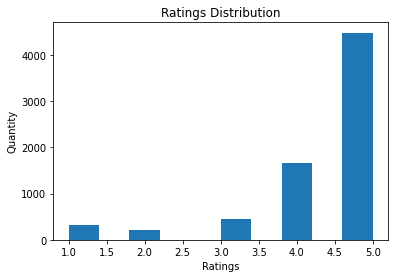

In [17]:
#Histogram of review ratings to visualize any trends.
plt.hist(df['Rating'])

plt.xlabel('Ratings')
plt.ylabel('Quantity')
plt.title('Ratings Distribution')

plt.show()

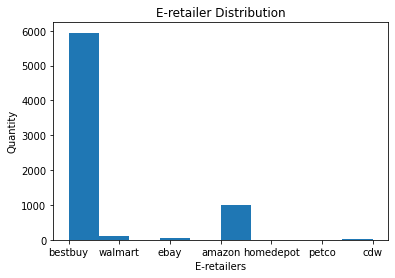

In [18]:
#Histogram of e-retailer distribution to visualize any trends.
plt.hist(df['e_retailer'])

plt.xlabel('E-retailers')
plt.ylabel('Quantity')
plt.title('E-retailer Distribution')

plt.show()

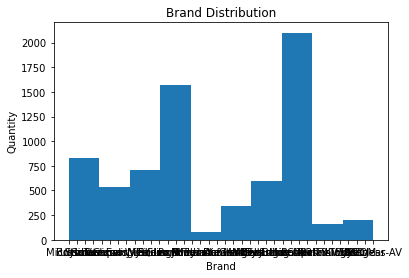

In [19]:
#Histogram of brand distribution to visualize any trends.
plt.hist(df['Brand'])

plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.title('Brand Distribution')

plt.show()

In [20]:
df['Brand'].value_counts()

Logitech                  1692
Sony                      1037
Microsoft                  495
JBL                        454
Samsung                    418
Sling Media                342
Alpine                     260
Pny                        191
Sanus                      162
MEE audio                  155
Sdi Technologies, Inc.     154
Netgear                    149
Verizon Wireless           140
JVC                        134
Lowepro                    131
Dell                       116
Yamaha                     115
Corsair                    114
Glengery                   114
Definitive Technology      108
Bowers & Wilkins           107
Ultimate Ears              100
Siriusxm                    90
Boytone                     74
WD                          50
Midland                     44
Motorola                    40
Belkin                      40
Lenovo                      28
Toshiba                     23
Bose                        20
CLARITY-TELECOM             11
House of

# Modeling

##Data Establishment

In [21]:
#Establishing feature matrix and y vector.

target = 'Rating'

X = df.drop(columns=target)
y = df[target]

print(X.shape)
print(y.shape)
print("The matrix and vector are the same length:", (len(y) == len(X)))

(7126, 8)
(7126,)
The matrix and vector are the same length: True


In [22]:
#Establishing the training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

print(X_train, X_test)

                                     Brand  ... Product_word_count
Review Date                                 ...                   
2016-02-19T00:00:00.000Z         Microsoft  ...                 54
2018-04-27T00:00:00.000Z              Sony  ...                 62
2017-07-19T00:00:00.000Z              Sony  ...                 62
2018-03-03T00:00:00.000Z           Samsung  ...                 55
2017-03-25T00:00:00.000Z  Verizon Wireless  ...                 67
...                                    ...  ...                ...
2017-07-07T00:00:00.000Z              Sony  ...                 62
2017-05-26T00:00:00.000Z               JBL  ...                 56
2016-08-12T00:00:00.000Z   CLARITY-TELECOM  ...                 41
2018-03-02T00:00:00.000Z           Netgear  ...                 44
2012-08-08T00:00:00.000Z           Lowepro  ...                 29

[5344 rows x 8 columns]                                           Brand  ... Product_word_count
Review Date                     

In [23]:
#Baseline Accuracy Score
#With categorical we simply use the highest count within our target to establish the baseline.
#Rounding to an integer to reflect a real world situation for final business purposes.

baseline_acc = round(y_train.value_counts(normalize=True)*100)

print('The Baseline Review Accuracy score is:', baseline_acc.max(), '%')

The Baseline Review Accuracy score is: 63.0 %


##Model Creation and Testing

###Regression Modeling

Logistic Regression Model

In [24]:
#Create the Logistic Regression model pipeline.
#OHE trial run
df_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    LogisticRegression())

#Fit the pipeline to the training set.
df_logr.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
#Produce accuracy scores on the training and test data sets.
training_acc = df_logr.score(X_train, y_train)
test_acc = df_logr.score(X_test, y_test)

#Print scores, including baseline for comparison.
#Model accuracy scores, kept in decimals while determining best fit.
print('Baseline Accuracy:', baseline_acc.max(), '%')
print('Training Accuracy Score:', training_acc, )
print('Test Accuracy Score:', test_acc)

Baseline Accuracy: 63.0 %
Training Accuracy Score: 0.6293038922155688
Test Accuracy Score: 0.6290684624017957


Logistic Regression Model - StandardScaler Trial

In [26]:
#Create the Logistic Regression model pipeline. 
#OHE and StandardScaler trial run
df_logr_SS = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression())

#Fit the pipeline to the training set.
df_logr_SS.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
#Produce accuracy scores on the training and test data sets.
training_acc = df_logr_SS.score(X_train, y_train)
test_acc = df_logr_SS.score(X_test, y_test)


#Print scores, including baseline for comparison.
#Model accuracy scores, kept in decimals while determining best fit.
print('Baseline Accuracy:', baseline_acc.max(), '%')
print('Training SS Accuracy:', training_acc)
print('Test SS Accuracy:', test_acc)

Baseline Accuracy: 63.0 %
Training SS Accuracy: 0.6641092814371258
Test SS Accuracy: 0.6520763187429854


Logistic Regression Model - OrdinalEncoder Trial



In [28]:
#Create the Logistic Regression model pipeline.
#OE and StandardScaler Trial Run.
df_logr_OE_SS = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression())

#Fit the pipeline to the training set.
df_logr_OE_SS.fit(X_train, y_train);

In [29]:
#Produce accuracy scores on the training and test data sets.
training_acc_OE = df_logr_OE_SS.score(X_train, y_train)
test_acc_OE = df_logr_OE_SS.score(X_test, y_test)

#Print scores, including baseline for comparison.
#Model accuracy scores, kept in decimals while determining best fit.
print('Baseline Accuracy:', baseline_acc.max(), '%')
print('Training OE SS MAE:', training_acc)
print('Test OE SS MAE:', test_acc)

Baseline Accuracy: 63.0 %
Training OE SS MAE: 0.6641092814371258
Test OE SS MAE: 0.6520763187429854


###Categorical Modeling

Random Forest Model - OneHotEncoder Trial

In [30]:
#Create the Random Forst model pipeline.
#OHE trial run
df_rf_OHE = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25, random_state=42))

#Fit the pipeline to the training set.
df_rf_OHE.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [31]:
#Random Forest OHE Cross validation Scores
cv_scores_rf_OHE = cross_val_score(df_rf_OHE, X_train, y_train, cv=3, n_jobs=-1)

#Print scores, including baseline for comparison.
#Model accuracy scores, kept in decimals while determining best fit.
print('CV score RandomForestClassifier')
print(cv_scores_rf_OHE)
print('Mean CV accuracy score:', round(cv_scores_rf_OHE.mean()*100), '%')
print('STD CV accuracy score:', cv_scores_rf_OHE.std())

CV score RandomForestClassifier
[0.58641975 0.5873105  0.61538462]
Mean CV accuracy score: 60 %
STD CV accuracy score: 0.013449133172848668


Random Forest Model - OrdinalEndcoder Trial

In [32]:
#Create the Random Forst with OE model pipeline.
#OE trial run
df_rf_OE = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25, random_state=42))

#Fit the pipeline to the training set.
df_rf_OE.fit(X_train, y_train);

In [33]:
#Random Forest OE Cross validation Scores
cv_scores_rf_OE = cross_val_score(df_rf_OE, X_train, y_train, cv=5, n_jobs=-1)


#Print scores, including baseline for comparison.
#Model accuracy scores, kept in decimals while determining best fit.
print('CV score RandomForestClassifier')
print(cv_scores_rf_OE)
print('Mean CV accuracy score:', round(cv_scores_rf_OE.mean()*100), '%')
print('STD CV accuracy score:', cv_scores_rf_OE.std())

CV score RandomForestClassifier
[0.58746492 0.59962582 0.61459308 0.58746492 0.61235955]
Mean CV accuracy score: 60 %
STD CV accuracy score: 0.011658969657896041


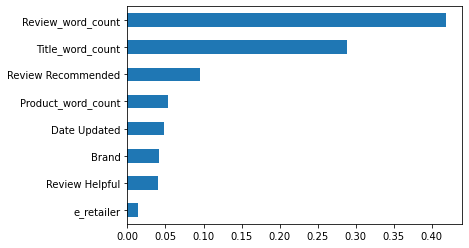

In [34]:
importances = df_rf_OE.named_steps['randomforestclassifier'].feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(data=importances, index=feature_names).sort_values()

feat_imp.tail(10).plot(kind='barh');

###Boosting and Permutations

XGBoost Model

In [35]:
#Create the XGBoost model pipeline.
df_xgb_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(random_state=42, n_jobs=-1))

#Fit the pipeline to the training set.
df_xgb_model.fit(X_train, y_train);

In [36]:
print('Baseline Accuracy:', baseline_acc.max(), '%')
print('XGBoost Training Accuracy', df_xgb_model.score(X_train, y_train))
print('XGBoost Testing Accuracy', df_xgb_model.score(X_test, y_test))

Baseline Accuracy: 63.0 %
XGBoost Training Accuracy 0.6775823353293413
XGBoost Testing Accuracy 0.6498316498316499


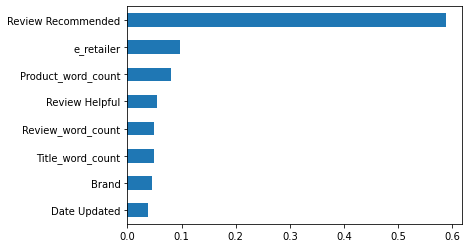

In [37]:
#Visualize XGBoost feature importance.
importances = df_xgb_model.named_steps['xgbclassifier'].feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(data=importances, index=feature_names).sort_values()

feat_imp.tail(10).plot(kind='barh');

Gradient Boosting Model

In [38]:
#Create the Gradient Boosting model pipeline.
df_gb_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(random_state=42))

#Fit the pipeline to the training set.
df_gb_model.fit(X_train, y_train);

In [39]:
print('Baseline Accuracy:', baseline_acc.max(), '%')
print('Gradient Boost Training Accuracy', df_gb_model.score(X_train, y_train))
print('Gradient Boost Testing Accuracy', df_gb_model.score(X_test, y_test))

Baseline Accuracy: 63.0 %
Gradient Boost Training Accuracy 0.7071482035928144
Gradient Boost Testing Accuracy 0.6425364758698092


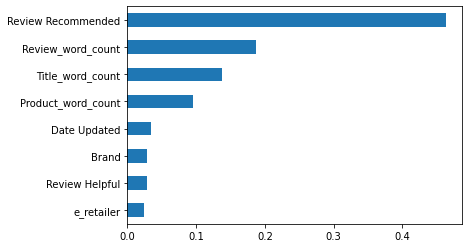

In [40]:
#Visualize Gradient Boost feature importance.
importances = df_gb_model.named_steps['gradientboostingclassifier'].feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(data=importances, index=feature_names).sort_values()

feat_imp.tail(10).plot(kind='barh');

#Communicate Results

##Logistic Regression Model Results

Logistic Regression Confusion Matrix
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        91
         2.0       0.00      0.00      0.00        60
         3.0       0.00      0.00      0.00       100
         4.0       0.71      0.01      0.02       412
         5.0       0.63      1.00      0.77      1119

    accuracy                           0.63      1782
   macro avg       0.27      0.20      0.16      1782
weighted avg       0.56      0.63      0.49      1782



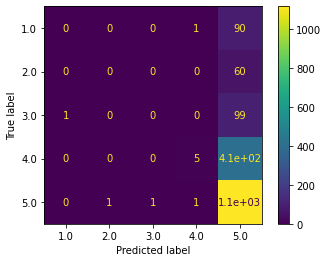

In [41]:
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve, mean_absolute_error

print("Logistic Regression Confusion Matrix")
print(classification_report(y_test, df_logr.predict(X_test)))
plot_confusion_matrix(df_logr, X_test, y_test);

##Categorical Model Results

Random Forest OE Confusion Matrix
              precision    recall  f1-score   support

         1.0       0.33      0.25      0.29        91
         2.0       0.22      0.13      0.17        60
         3.0       0.22      0.23      0.22       100
         4.0       0.32      0.23      0.27       412
         5.0       0.73      0.82      0.77      1119

    accuracy                           0.60      1782
   macro avg       0.36      0.33      0.34      1782
weighted avg       0.57      0.60      0.58      1782



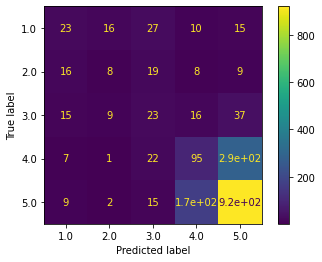

In [42]:
print("Random Forest OE Confusion Matrix")
print(classification_report(y_test, df_rf_OE.predict(X_test)))
plot_confusion_matrix(df_rf_OE, X_test, y_test);

XGBoost Confusion Matrix
              precision    recall  f1-score   support

         1.0       0.43      0.11      0.18        91
         2.0       0.25      0.07      0.11        60
         3.0       0.30      0.25      0.27       100
         4.0       0.50      0.02      0.03       412
         5.0       0.68      0.99      0.80      1119

    accuracy                           0.65      1782
   macro avg       0.43      0.29      0.28      1782
weighted avg       0.59      0.65      0.54      1782



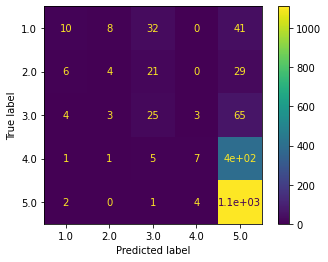

In [43]:
print("XGBoost Confusion Matrix")
print(classification_report(y_test, df_xgb_model.predict(X_test)))
plot_confusion_matrix(df_xgb_model, X_test, y_test);

In [44]:
#XGB Model Permutation Importance
perm_imp_xgb = permutation_importance(df_xgb_model, 
                                  X_train, 
                                  y_train, 
                                  n_repeats=5, 
                                  n_jobs=-1, 
                                  random_state=42)

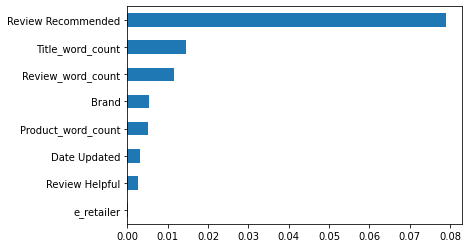

In [45]:
data_xgb = {'imp_mean': perm_imp_xgb['importances_mean'],
        'imp_std': perm_imp_xgb['importances_std']}

importances = pd.DataFrame(data_xgb, index=X_test.columns).sort_values(by='imp_mean')

importances.head()

importances['imp_mean'].tail(10).plot(kind='barh')

In [46]:
importances.head(10)

,imp_mean,imp_std
e_retailer,0.000225,0.000631
Review Helpful,0.002582,0.000400
Date Updated,0.002994,0.000886
Product_word_count,0.005090,0.001226
Brand,0.005314,0.001342
Review_word_count,0.011639,0.001221
Title_word_count,0.014484,0.001896
Review Recommended,0.079042,0.001126


Gradient Boost Confusion Matrix
              precision    recall  f1-score   support

         1.0       0.32      0.20      0.24        91
         2.0       0.23      0.08      0.12        60
         3.0       0.29      0.22      0.25       100
         4.0       0.29      0.03      0.06       412
         5.0       0.69      0.97      0.80      1119

    accuracy                           0.64      1782
   macro avg       0.36      0.30      0.30      1782
weighted avg       0.54      0.64      0.55      1782



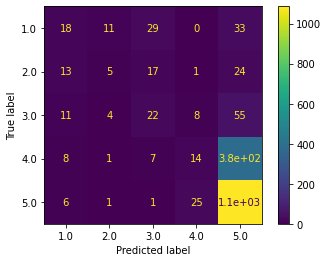

In [47]:
print("Gradient Boost Confusion Matrix")
print(classification_report(y_test, df_gb_model.predict(X_test)))
plot_confusion_matrix(df_gb_model, X_test, y_test);

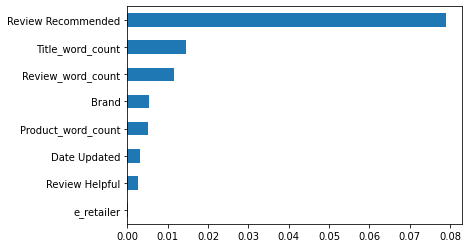

In [48]:
#GB Model Permutation Importance
perm_imp_gb = permutation_importance(df_gb_model, 
                                  X_train, 
                                  y_train, 
                                  n_repeats=5, 
                                  n_jobs=-1, 
                                  random_state=42)

importances['imp_mean'].tail(10).plot(kind='barh')

In [49]:
data_gb = {'imp_mean': perm_imp_gb['importances_mean'],
        'imp_std': perm_imp_gb['importances_std']}

importances = pd.DataFrame(data_gb, index=X_test.columns).sort_values(by='imp_mean')

importances.head(10)

,imp_mean,imp_std
Review Helpful,0.006811,0.000575
Brand,0.007410,0.000633
e_retailer,0.008795,0.001454
Date Updated,0.010778,0.000929
Product_word_count,0.011527,0.001101
Review_word_count,0.038361,0.001897
Title_word_count,0.040082,0.004269
Review Recommended,0.098278,0.001427
